In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/all_opinions.csv', encoding='utf-8').set_index(['author_name', 'federal_cite_one'])

<AxesSubplot:>

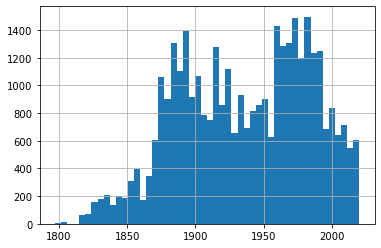

In [3]:
df['year_filed'].hist(bins=50)

In [18]:
df.isna().sum()

category                      0
per_curiam                    0
case_name                     0
date_filed                    0
absolute_url                  0
cluster                       0
year_filed                    0
scdb_id                    1763
scdb_decision_direction    1768
scdb_votes_majority        1763
scdb_votes_minority        1763
text                          0
dtype: int64

In [19]:
df[df['scdb_id'].isna()].head()

,,category,per_curiam,case_name,date_filed,absolute_url,cluster,year_filed,scdb_id,scdb_decision_direction,scdb_votes_majority,scdb_votes_minority,text
author_name,federal_cite_one,,,,,,,,,,,,
per_curiam,382 U.S. 39,per_curiam,True,Wells v. Reynolds,1965-10-18,https://www.courtlistener.com/opinion/1087654/...,https://www.courtlistener.com/api/rest/v3/clus...,1965,NaN,NaN,NaN,NaN,The judgment is affirmed.\nMR. JUSTICE DOUGLAS...
Justice Kagan,NaN,majority,False,Kaley v. United States,2014-02-25,https://www.courtlistener.com/opinion/2654533/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,NaN,NaN,NaN,NaN,"A federal statute, 21 U.S. C. §853(e), authori..."
Justice Roberts,NaN,dissenting,False,Kaley v. United States,2014-02-25,https://www.courtlistener.com/opinion/2654533/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,NaN,NaN,NaN,NaN,An individual facing serious criminal charges ...
Justice Kennedy,NaN,majority,False,"Masterpiece Cakeshop, Ltd. v. Colorado Civil R...",2018-06-13,https://www.courtlistener.com/opinion/4507882/...,https://www.courtlistener.com/api/rest/v3/clus...,2018,NaN,NaN,NaN,NaN,In 2012 a same-sex couple visited Masterpiece\...
Justice Kagan,NaN,concurring,False,"Masterpiece Cakeshop, Ltd. v. Colorado Civil R...",2018-06-13,https://www.courtlistener.com/opinion/4507882/...,https://www.courtlistener.com/api/rest/v3/clus...,2018,NaN,NaN,NaN,NaN,“[I]t is a general rule that [religious and ph...


In [9]:
pd.set_option('display.max_colwidth', None)
df[df['case_name'] == 'Kaley v. United States']['absolute_url']

author_name      federal_cite_one
Justice Kagan    NaN                 https://www.courtlistener.com/opinion/2654533/kaley-v-united-states/
Justice Roberts  NaN                 https://www.courtlistener.com/opinion/2654533/kaley-v-united-states/
Justice Kagan    NaN                 https://www.courtlistener.com/opinion/2654756/kaley-v-united-states/
Justice Roberts  NaN                 https://www.courtlistener.com/opinion/2654756/kaley-v-united-states/
Name: absolute_url, dtype: object

In [11]:
pd.set_option('display.max_colwidth', -1)
df[df['case_name'] == 'Kaley v. United States']['cluster']

<ipython-input-11-da87b4592905>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


author_name      federal_cite_one
Justice Kagan    NaN                 https://www.courtlistener.com/api/rest/v3/clusters/2654533/
Justice Roberts  NaN                 https://www.courtlistener.com/api/rest/v3/clusters/2654533/
Justice Kagan    NaN                 https://www.courtlistener.com/api/rest/v3/clusters/2654756/
Justice Roberts  NaN                 https://www.courtlistener.com/api/rest/v3/clusters/2654756/
Name: cluster, dtype: object

In [4]:
import sklearn.feature_extraction.text as text
vec = text.CountVectorizer(lowercase=True, min_df=100, stop_words='english')
dtm = vec.fit_transform(df['text'])
print(f'Shape of document-term matrix is {dtm.shape} and the number of tokens is {dtm.sum()}')

Shape of document-term matrix is (35781, 14162) and the number of tokens is 39876522


In [5]:
import sklearn.decomposition as decomposition
model = decomposition.LatentDirichletAllocation(n_components=100, learning_method='online', random_state=1)
document_topic_distributions = model.fit_transform(dtm)

In [7]:
vocabulary = vec.get_feature_names()

In [8]:
assert model.components_.shape == (100, len(vocabulary))

In [9]:
topic_names = [f'Topic {k}' for k in range(100)]
topic_word_distributions = pd.DataFrame(model.components_, columns=vocabulary, index=topic_names)
document_topic_distributions = pd.DataFrame(document_topic_distributions, columns=topic_names, index=df.index)

In [10]:
document_topic_distributions.head(10)

,,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 90,Topic 91,Topic 92,Topic 93,Topic 94,Topic 95,Topic 96,Topic 97,Topic 98,Topic 99
author_name,federal_cite_one,,,,,,,,,,,,,,,,,,,,,
Justice Roberts,NaN,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,...,0.000002,0.000002,0.000002,0.002261,0.000002,0.000002,0.000850,0.000002,0.000002,0.198880
Justice Thomas,NaN,0.003246,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,...,0.001644,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.172919
Justice Breyer,NaN,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000215,0.000002,...,0.001048,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.151052
Justice Taney,40 U.S. 119,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,...,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063
Justice Pitney,233 U.S. 546,0.000007,0.000007,0.000007,0.000007,0.000007,0.045091,0.000007,0.000007,0.000007,0.000007,...,0.000007,0.000007,0.000007,0.000007,0.006567,0.000007,0.000007,0.004247,0.000007,0.000007
Justice Harlan,105 U.S. 77,0.000005,0.099721,0.000005,0.001575,0.019138,0.352040,0.000005,0.000005,0.000005,0.000005,...,0.000005,0.046626,0.000005,0.000005,0.000005,0.002622,0.000005,0.001532,0.000005,0.000005
per_curiam,382 U.S. 39,0.000769,0.000769,0.000769,0.000769,0.000769,0.000769,0.077797,0.000769,0.000769,0.000769,...,0.000769,0.000769,0.000769,0.000769,0.000769,0.000769,0.000769,0.000769,0.000769,0.000769
Justice Miller,132 U.S. 118,0.000011,0.000011,0.000011,0.000011,0.027289,0.029741,0.000011,0.000011,0.000011,0.000011,...,0.000011,0.016678,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011
Justice Frankfurter,NaN,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.068188,0.003049,0.001263,0.000013,...,0.000013,0.000013,0.000013,0.009533,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013


In [16]:
document_topic_distributions.to_csv('doc_topic_distributions.csv', header=True)

In [11]:
#document_topic_distributions.loc[df['scdb_id'] == '1972-048'].loc[df['author_name'] == 'Justice Blackmun'].head(10)

In [12]:
#blackmun_majority = document_topic_distributions.loc[df['scdb_id'] == '1972-048'].loc[df['author_name'] == 'Justice Blackmun']

In [13]:
#print(blackmun_majority.head(10))
#blackmun_majority_trans = blackmun_majority.T
#blackmun_majority_trans.sort_values(by=763, axis='index', ascending=False)


In [14]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
topic_word_distributions.loc['Topic 83'].sort_values(ascending=False).head(25)

court               38925.602070
constitutional      14481.241236
amendment           13760.940662
state               12001.374397
clause              11513.080040
supra               11493.734226
does                 9916.986543
process              9561.662956
interests            9166.897700
id                   8470.533092
cases                8389.553767
case                 8373.958783
protection           7861.232569
opinion              6554.309606
government           6183.780194
statute              6162.417769
particular           5634.916511
basis                5096.151209
substantial          5070.480579
judgment             4951.595172
test                 4830.138313
decision             4823.187180
issue                4610.352405
constitutionally     4587.236823
governmental         4560.546322
Name: Topic 83, dtype: float64

[Text(0.5, 0, 'Rank of mixing weight'),
 Text(0, 0.5, 'Probability'),
 (0.0, 25.0)]

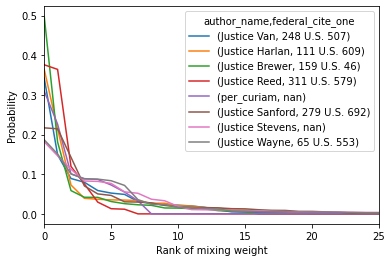

In [15]:
weights_sample = document_topic_distributions.sample(8)
weights_ordered = weights_sample.apply(lambda row: row.sort_values(ascending=False).reset_index(drop=True), axis=1)
ax = weights_ordered.T.plot()
ax.set(xlabel='Rank of mixing weight', ylabel='Probability', xlim=(0, 25))